<a href="https://colab.research.google.com/github/victoriawhite17/Mushroom-Class/blob/main/Mushroom_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSbR55nE3zGH4o6GSFb04uc53sychDYZWEgRfQbjLo79r2yuCfZuFUVz9LDKkE3uBVj9vuRGB7mElVS/pub?gid=2046584450&single=true&output=csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
ml_df = df.copy()

In [5]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

##Checking for Missing Values and Dropping Duplicates

In [6]:
ml_df.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

There are no missing values in our dataset. 

In [7]:
ml_df.duplicated().sum()

0

There are no duplicates in our dataset.

In [8]:
#checking for errors or any variations in data
print('Class')
print(ml_df['class'].value_counts())
print('Cap Shape')
print(ml_df['cap-shape'].value_counts())
print('Cap Surface')
print(ml_df['cap-surface'].value_counts())
print('Cap Color')
print(ml_df['cap-color'].value_counts())
print('Bruises')
print(ml_df['bruises'].value_counts())
print('Gill Attachment')
print(ml_df['gill-attachment'].value_counts())
print('Gill Spacing')
print(ml_df['gill-spacing'].value_counts())
print('Gill Size')
print(ml_df['gill-size'].value_counts())
print('Gill Color')
print(ml_df['gill-color'].value_counts())
print('Stalk Shape')
print(ml_df['stalk-shape'].value_counts())
print('Stalk Root')
print(ml_df['stalk-root'].value_counts())
print('Stalk Surface Above Ring')
print(ml_df['stalk-surface-above-ring'].value_counts())
print('Stalk Surface Below Ring')
print(ml_df['stalk-surface-below-ring'].value_counts())
print('Stalk Color Above Ring')
print(ml_df['stalk-color-above-ring'].value_counts())
print('Stalk Color Below Ring')
print(ml_df['stalk-color-below-ring'].value_counts())
print('Veil Type')
print(ml_df['veil-type'].value_counts())
print('Veil Color')
print(ml_df['veil-color'].value_counts())
print('Ring Number')
print(ml_df['ring-number'].value_counts())
print('Ring Type')
print(ml_df['ring-type'].value_counts())
print('Spore Print Color')
print(ml_df['spore-print-color'].value_counts())
print('Population')
print(ml_df['population'].value_counts())
print('Habitat')
print(ml_df['habitat'].value_counts())

Class
e    4208
p    3916
Name: class, dtype: int64
Cap Shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
Cap Surface
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
Cap Color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
Bruises
f    4748
t    3376
Name: bruises, dtype: int64
Gill Attachment
f    7914
a     210
Name: gill-attachment, dtype: int64
Gill Spacing
c    6812
w    1312
Name: gill-spacing, dtype: int64
Gill Size
b    5612
n    2512
Name: gill-size, dtype: int64
Gill Color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
Stalk Shape
t    4608
e    3516
Name: stalk-shape, dtype: int64
Stalk Root
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
Stalk Surface Above Ring
s    5176
k    2372
f     5

We see that stalk root has 2480 missing values.  ?    2480 We have enough features in our dataset about characteristics of the stalk of a mushroom, so we will drop this feature with such a high missing value.

In [9]:
ml_df.drop(columns=['stalk-root'], inplace=True)

##Preprocessing

In [120]:
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
#setting PCA to retain 85% of the variance
pca = PCA(n_components=0.85, random_state=42)

In [75]:
#train test split to avoid data leakage
X = ml_df.drop(columns=['class'])
y = ml_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [116]:
#creating pipeline for models
knn = KNeighborsClassifier()
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(random_state=42)

knn_pipe = make_pipeline(ohe, pca, knn)
lr_pipe = make_pipeline(ohe, pca, lr)
rf_pipe = make_pipeline(ohe, pca, rf)

##Logistic Regression

In [86]:
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('pca', PCA(n_components=0.85, random_state=42)),
                ('logisticregression',
                 LogisticRegression(max_iter=1000, random_state=42))])

In [87]:
#finding the predictions from our model
train_lr_pred = lr_pipe.predict(X_train)
test_lr_pred = lr_pipe.predict(X_test)

In [88]:
#evaluating model performance
lr_train_report = classification_report(y_train, train_lr_pred)
lr_test_report = classification_report(y_test, test_lr_pred)
print('LogReg Test Classification Report')
print(lr_test_report)
print('LogReg Train Classification Report')
print(lr_train_report)

LogReg Test Classification Report
              precision    recall  f1-score   support

           e       0.98      0.98      0.98      1040
           p       0.98      0.97      0.98       991

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031

LogReg Train Classification Report
              precision    recall  f1-score   support

           e       0.97      0.99      0.98      3168
           p       0.98      0.97      0.98      2925

    accuracy                           0.98      6093
   macro avg       0.98      0.98      0.98      6093
weighted avg       0.98      0.98      0.98      6093



Overall it appeears our model did a good job with predictions. We see that our training data and testing data match each other resulting in a model with overall high accuracy, recall, and precision.

##Hypertuning Logistic Regression Model

In [89]:
lr.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [90]:
#setting parameters
lr_param_grid = {'C': [0.1, 1, 10, 100, 1000]}

In [91]:
#using GridSearch to quickly find best parameter
lr_grid_search = GridSearchCV(lr, lr_param_grid)
lr_grid_pipe = make_pipeline(ohe, pca, lr_grid_search)
lr_grid_pipe.fit(X_train, y_train)
lr_best_params = lr_grid_search.best_params_
lr_best_params

{'C': 10}

In [92]:
#hypertuning with best parameters
best_lr = LogisticRegression(C=10, max_iter=1000, random_state=42)
best_lr_pipe = make_pipeline(ohe, pca, best_lr)

In [93]:
#finding new predictions with best parameters
best_lr_pipe.fit(X_train, y_train)
lr2_train_pred = best_lr_pipe.predict(X_train)
lr2_test_pred = best_lr_pipe.predict(X_test)

In [94]:
#evaluating hypertuned model performance
lr2_train_report = classification_report(lr2_train_pred, y_train)
lr2_test_report = classification_report(lr2_test_pred, y_test)
print('LogReg Train Classification Report')
print(lr2_train_report)
print('LogReg Test Classification Report')
print(lr2_test_report)

LogReg Train Classification Report
              precision    recall  f1-score   support

           e       0.98      0.98      0.98      3196
           p       0.97      0.98      0.98      2897

    accuracy                           0.98      6093
   macro avg       0.98      0.98      0.98      6093
weighted avg       0.98      0.98      0.98      6093

LogReg Test Classification Report
              precision    recall  f1-score   support

           e       0.98      0.98      0.98      1046
           p       0.97      0.98      0.98       985

    accuracy                           0.98      2031
   macro avg       0.98      0.98      0.98      2031
weighted avg       0.98      0.98      0.98      2031



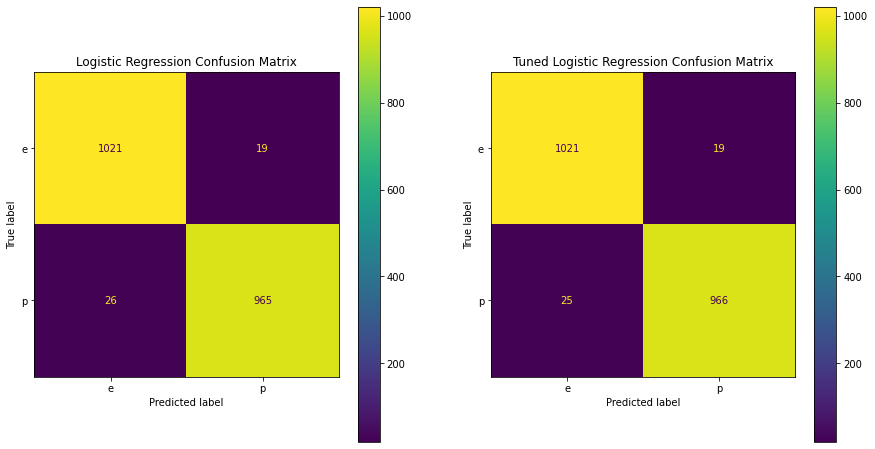

In [95]:
#creating confusion metrix to see how our model performed
fig, axes = plt.subplots(1, 2, figsize=(15,8))
ConfusionMatrixDisplay.from_predictions(y_test, test_lr_pred, ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, lr2_test_pred, ax=axes[1])
axes[1].set_title('Tuned Logistic Regression Confusion Matrix');

We see that we have over 26/27 mushrooms that were poisonous, but were labelled edible. This is a costly error and we would want to reduce it. Even after tuning, we see that our model stays similar with our tuned Logistic Regression model having the best results with 25 false negatives.

##KNN

In [96]:
#fitting model on our data and finding predictions
knn_pipe.fit(X_train, y_train)
knn_train_pred = knn_pipe.predict(X_train)
knn_test_pred = knn_pipe.predict(X_test)

In [97]:
#classification report to see how our model performs
knn_train_report = classification_report(y_train, knn_train_pred)
knn_test_report = classification_report(y_test, knn_test_pred)
print('KNN Train Classification Report')
print(knn_train_report)
print('KNN Test Classification Report')
print(knn_test_report)

KNN Train Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3168
           p       1.00      1.00      1.00      2925

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

KNN Test Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



Overall the KNN model seems to perform perfectly on this dataset. There is a high correlatiom between features in this dataset that result in a perfect performance by our KNN model.

##Hypertuning KNN Model

In [98]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [99]:
#setting parameters
knn_param_grid = {'n_neighbors': [5,10,15],
                  'leaf_size': [15, 30, 45]}

In [100]:
#using GridSearch to quickly find best parameters
knn_grid_search = GridSearchCV(knn, knn_param_grid)
knn_grid_pipe = make_pipeline(ohe, pca, knn_grid_search)
knn_grid_pipe.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False)),
                ('pca', PCA(n_components=0.85, random_state=42)),
                ('gridsearchcv',
                 GridSearchCV(estimator=KNeighborsClassifier(),
                              param_grid={'leaf_size': [15, 30, 45],
                                          'n_neighbors': [5, 10, 15]}))])

In [101]:
best_knn = knn_grid_search.best_estimator_
best_knn

KNeighborsClassifier(leaf_size=15)

In [107]:
#hypertuning our model with best parameters
knn15 = KNeighborsClassifier(leaf_size=15)
knn15_pipe = make_pipeline(ohe, pca, knn15)
knn15_pipe.fit(X_train, y_train)
knn15_train_pred = knn15_pipe.predict(X_train)
knn15_test_pred = knn15_pipe.predict(X_test)

In [110]:
knn15_train_report = classification_report(knn15_train_pred, y_train)
knn15_test_report = classification_report(knn15_test_pred, y_test)
print('KNN-15 Train Classification Report')
print(knn15_train_report)
print('KNN-15 Test Classification Report')
print(knn15_test_report)

KNN-15 Train Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      3168
           p       1.00      1.00      1.00      2925

    accuracy                           1.00      6093
   macro avg       1.00      1.00      1.00      6093
weighted avg       1.00      1.00      1.00      6093

KNN-15 Test Classification Report
              precision    recall  f1-score   support

           e       1.00      1.00      1.00      1040
           p       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



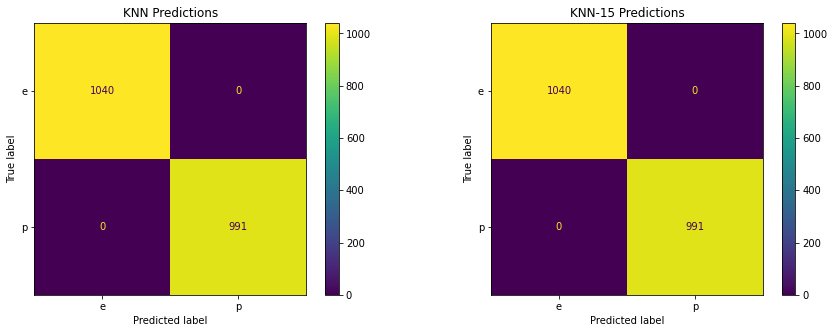

In [111]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred, ax=axes[0])
axes[0].set_title('KNN Predictions')
ConfusionMatrixDisplay.from_predictions(y_test, knn10_test_pred, ax=axes[1])
axes[1].set_title('KNN-15 Predictions');

We see our original KNN model and our tuned KNN model performed the same. Both models can predict training and testing data because our features have a high correlation with each other. 

#Results

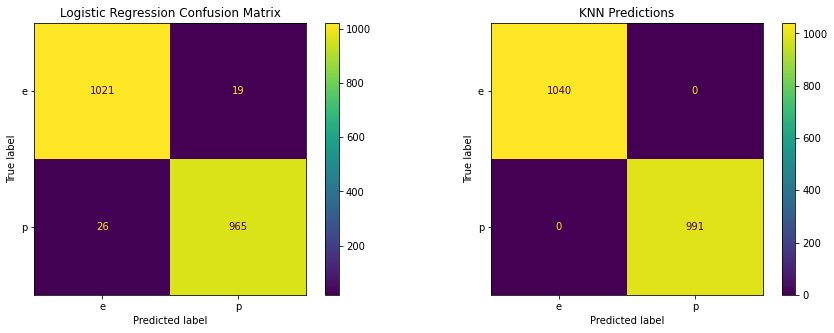

In [112]:
fig, axes = plt.subplots(1,2, figsize=(15,5))
ConfusionMatrixDisplay.from_predictions(y_test, test_lr_pred, ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
ConfusionMatrixDisplay.from_predictions(y_test, knn_test_pred, ax=axes[1])
axes[1].set_title('KNN Predictions');

Our KNN model has the best performance because of the high correlation in this dataset.